<a href="https://colab.research.google.com/github/LazaroR-u/GSoC_QMLHEP_2024/blob/main/tasks/task_1_GSoC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GSoC 2024 ML4SCI QML-HEP Tasks


**Diaz Lievano Lazaro Raul**


## Task I: Quantum Computing Part

1) implement a simple quantum operation with Cirq or Pennylane

    a. With 5 qubits

    b. Apply Hadamard operation on every qubit

    c. Apply CNOT operation on (0, 1), (1, 2), (2, 3), (3, 4)

    d. Rotate X with pi/2 on any qubit

    e. SWAP (0, 4)

    f. Plot the circuit



2) Implement a second circuit with a framework of your choice:

    a. Apply a Hadamard gate to the first qubit.

    b. Rotate the second qubit by pi/3 around X.

    c. Apply a Hadamard gate to the third and fourth qubit.

    d. Perform a swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4>.

  


# Subtask 1

## Implementation with CIRQ

In [71]:
%%capture
pip install cirq

In [72]:
import cirq
import math
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit as plot_circuit
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

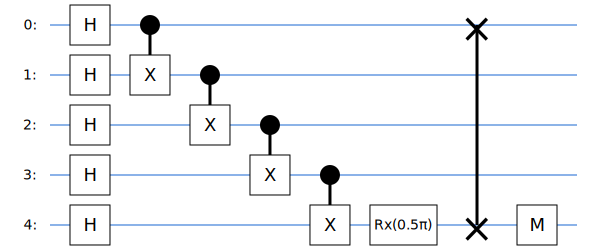

In [73]:
# Define the 5 qubits
qubits = cirq.LineQubit.range(5)

# Define the circuit
circuit1 = cirq.Circuit(
    # Hadamard on every qubit
    cirq.H.on_each(*qubits),

    # CNOT on (0, 1), (1, 2), (2, 3), (3, 4)
    cirq.CNOT(qubits[0], qubits[1]),
    cirq.CNOT(qubits[1], qubits[2]),
    cirq.CNOT(qubits[2], qubits[3]),
    cirq.CNOT(qubits[3], qubits[4]),

    # Rotate the last qubit by pi/2 around X
    cirq.rx(math.pi / 2).on(qubits[4]),

    # SWAP (0, 4)
    cirq.SWAP(qubits[0], qubits[4]),


    cirq.measure(qubits[4])
)

# Plot the circuit
plot_circuit(circuit1)

In [74]:
simulator = cirq.Simulator()
reps = 1_000
result = simulator.run(circuit1, repetitions=reps).data
dict(result.iloc[:,0].value_counts()/reps)

{0: 0.509, 1: 0.491}

## implementation with QISKIT

In [75]:
%%capture
pip install qiskit

In [76]:
%%capture
pip install pylatexenc

In [77]:
import qiskit
import numpy as np


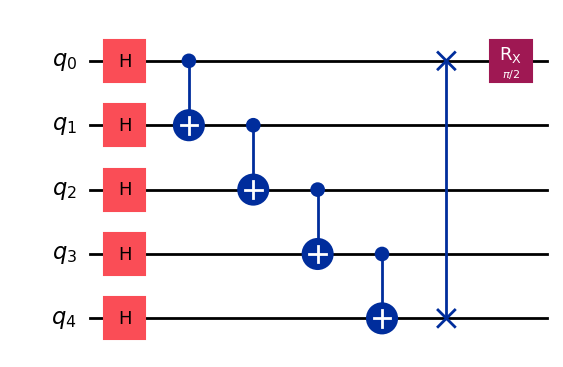

In [78]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 5 qubits
circuit = QuantumCircuit(5)

# Apply Hadamard operation on every qubit
for qubit in range(5):
    circuit.h(qubit)

# Apply CNOT operation on (0, 1), (1, 2), (2, 3), (3, 4)
for i in range(4):
    circuit.cx(i, i+1)

# SWAP (0, 4)
circuit.swap(0, 4)

# Rotate X with pi/2 on any qubit
circuit.rx(np.pi/2, 0)

# Plot the circuit
circuit.draw(output="mpl")

# Execute the circuit on a simulator
#backend = Aer.get_backend('qasm_simulator')
#result = execute(circuit, backend)

# Print the results
#print(result.get_data())


## Implementation with Pennylane

In [79]:
%%capture
pip install pennylane

In [80]:
import pennylane as qml
from pennylane import numpy as np

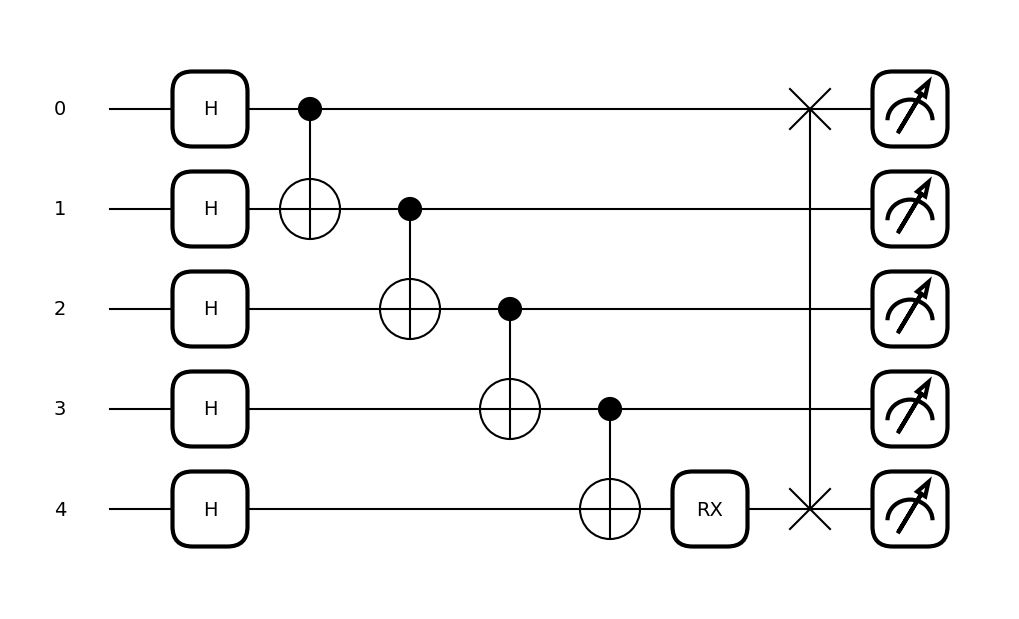

In [90]:
# Define the device and number of wires
dev = qml.device("default.qubit", wires=5)

# Define the circuit
@qml.qnode(dev)
def circuit1():
    # Hadamard on every qubit
    for i in range(len(dev.wires)):
        qml.Hadamard(wires=i)

    # CNOT on (0, 1), (1, 2), (2, 3), (3, 4)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[3, 4])

    # Rotate the last qubit by pi/2 around X
    qml.RX(np.pi/2, wires=4)

    # SWAP (0, 4)
    qml.SWAP(wires=[0, 4])

    # return the probabilities of each state
    return qml.probs()

qml.draw_mpl(circuit1)();

# Subtask 2

## Implementation with Cirq

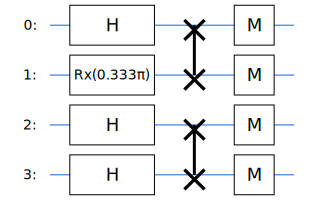

In [91]:
#viz_model.view(fontname="monospace")

qubits2 = cirq.LineQubit.range(4)

circuit2 = cirq.Circuit(
    # Hadamard on first qubit
    cirq.H(qubits2[0]),

    # Rotate the second qubit by pi/3 around X
    cirq.rx(math.pi / 3).on(qubits2[1]),

    #apply hadamart gate to the third and fourth qubit
    cirq.H(qubits2[2]),
    cirq.H(qubits2[3]),

    # SWAP (0, 1), (2,3)
    cirq.SWAP(qubits2[0], qubits2[1]),
    cirq.SWAP(qubits2[2], qubits2[3]),

    cirq.measure_each(qubits2)
)
# Plot the circuit
plot_circuit(circuit2)


In [92]:
simulator = cirq.Simulator()
reps = 1_000
result = simulator.run(circuit2, repetitions=reps).data

for i in range(len(qubits2)):
  print(f"qubit {i}: {dict(result.iloc[:,i].value_counts()/reps)}")


qubit 0: {0: 0.727, 1: 0.273}
qubit 1: {1: 0.503, 0: 0.497}
qubit 2: {1: 0.52, 0: 0.48}
qubit 3: {0: 0.508, 1: 0.492}


## Implementation with Pennylane

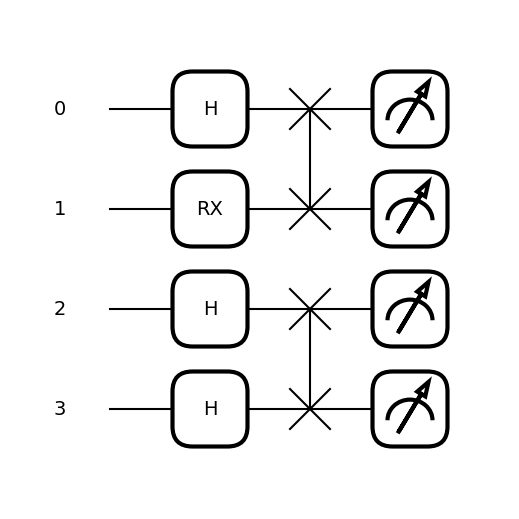

In [93]:
dev = qml.device("default.qubit", wires = 4)

@qml.qnode(dev)

def circuit2():
  qml.Hadamard(0)
  qml.RX(np.pi/3, wires =1)
  qml.Hadamard(2)
  qml.Hadamard(3)
  qml.SWAP(wires=[0, 1])
  qml.SWAP(wires=[2, 3])

  return qml.probs()

qml.draw_mpl(circuit2)();

In [94]:
print(circuit2())

[0.09375 0.09375 0.09375 0.09375 0.09375 0.09375 0.09375 0.09375 0.03125
 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125]


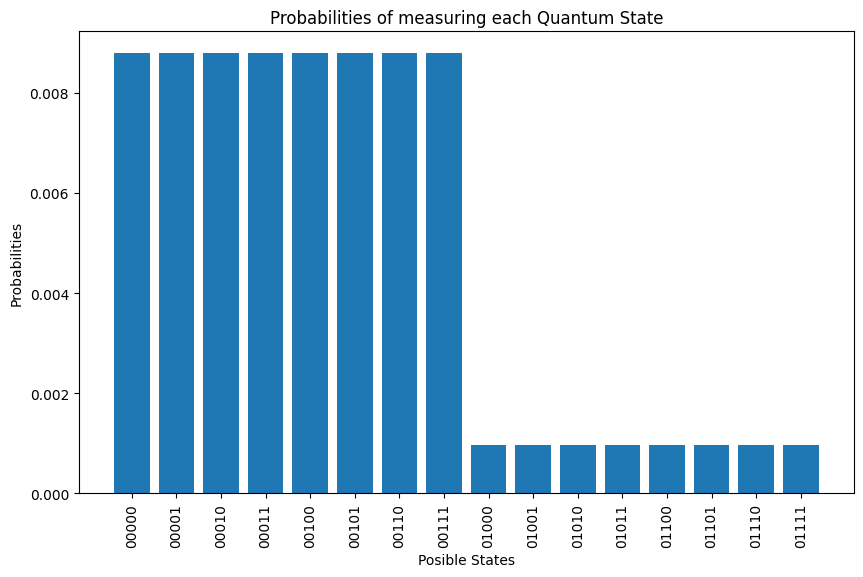

In [96]:
state = circuit2()

probs = np.abs(state) ** 2

plt.figure(figsize=(10, 6))
states = [format(i, '05b') for i in range(16)]
plt.bar(states, probs)
plt.xlabel('Posible States')
plt.ylabel('Probabilities')
plt.title('Probabilities of measuring each Quantum State')
plt.xticks(rotation=90)
plt.show()